In [25]:
import pandas as pd
import numpy as np
import warnings
import time

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

In [4]:
# read datasets 
enc = pd.read_csv('../../data/regional_datasets/univariate/enc_data_univ.csv')
esc = pd.read_csv('../../data/regional_datasets/univariate/esc_data_univ.csv')
mid_atlantic = pd.read_csv('../../data/regional_datasets/univariate/mid_atlantic_data_univ.csv')
mountain = pd.read_csv('../../data/regional_datasets/univariate/mountain_data_univ.csv')
new_england = pd.read_csv('../../data/regional_datasets/univariate/new_england_data_univ.csv')
pacific = pd.read_csv('../../data/regional_datasets/univariate/pacific_data_univ.csv')
south_atlantic = pd.read_csv('../../data/regional_datasets/univariate/south_atlantic_data_univ.csv')
wnc = pd.read_csv('../../data/regional_datasets/univariate/wnc_data_univ.csv')
wsc = pd.read_csv('../../data/regional_datasets/univariate/wsc_data_univ.csv')
datasets = [enc, esc, mid_atlantic, mountain, new_england, pacific, south_atlantic, wnc, wsc]
for df in datasets:
    df.set_index(pd.to_datetime(df['date']), inplace=True)
    df.drop(columns=["Unnamed: 0", "date"], axis=1, inplace=True)
    df.sort_index(inplace=True)
    


# ARIMA

In [17]:
def build_arima_model(df, params=None, plot=False):
    region = df["region"].iloc[0]
    print(f"Training model for {region}...")

    size = round(df.shape[0]*0.15)
    train = df.iloc[:-size]['new_confirmed']
    test = df.iloc[-size:]['new_confirmed']

    if params:
        model = ARIMA(train, order=params)
    else:
        model = ARIMA(train, order=(4,1,4))
    model_fit = model.fit()

    pred = model_fit.forecast(steps=size)
    pred = pred
    

    # calculate metrics
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = mean_squared_error(test, pred, squared=False)
    mase = mean_absolute_scaled_error(test, pred, y_train=train)

    print(f'MAE: {round(mae, 2)}')
    print(f'MSE: {round(mse, 2)}')
    print(f'RMSE: {round(rmse, 2)}')
    print(f'MASE: {round(mase, 2)}')

    # plot predictions
    if plot:
        plt.figure(figsize=(15, 5))
        plt.title(f'ARIMA Predictions for {region}')
        plt.plot(test.index, test, label='True')
        plt.plot(pred.index, pred, label='Predicted')
        plt.legend() 
        plt.show()

Training model for East North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 10125.15
MSE: 150630219.98
RMSE: 12273.15
MASE: 1.28


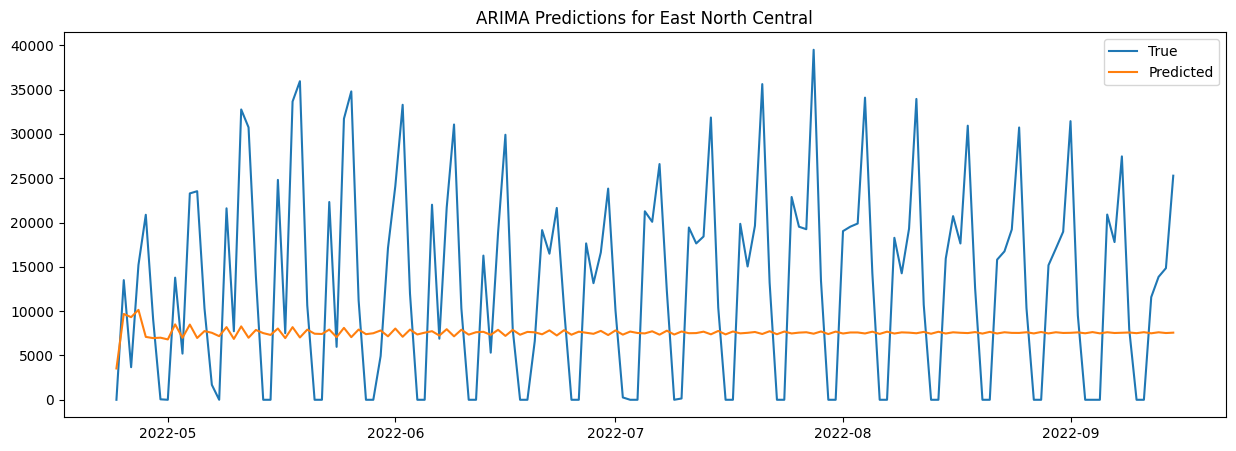


Training model for East South Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 5278.08
MSE: 64189050.59
RMSE: 8011.81
MASE: 1.59


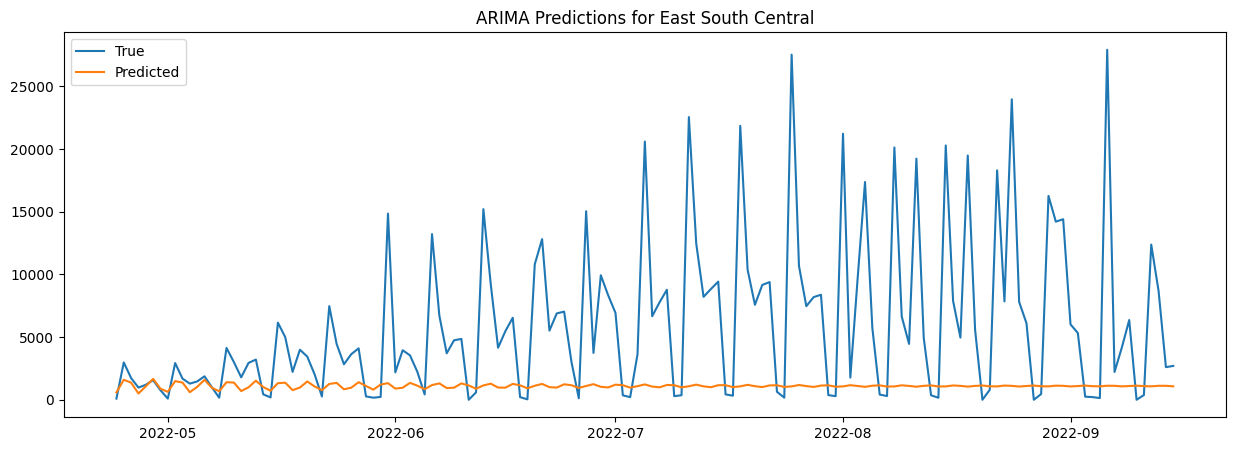


Training model for Mid-Atlantic...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 5396.31
MSE: 45967457.09
RMSE: 6779.93
MASE: 2.54


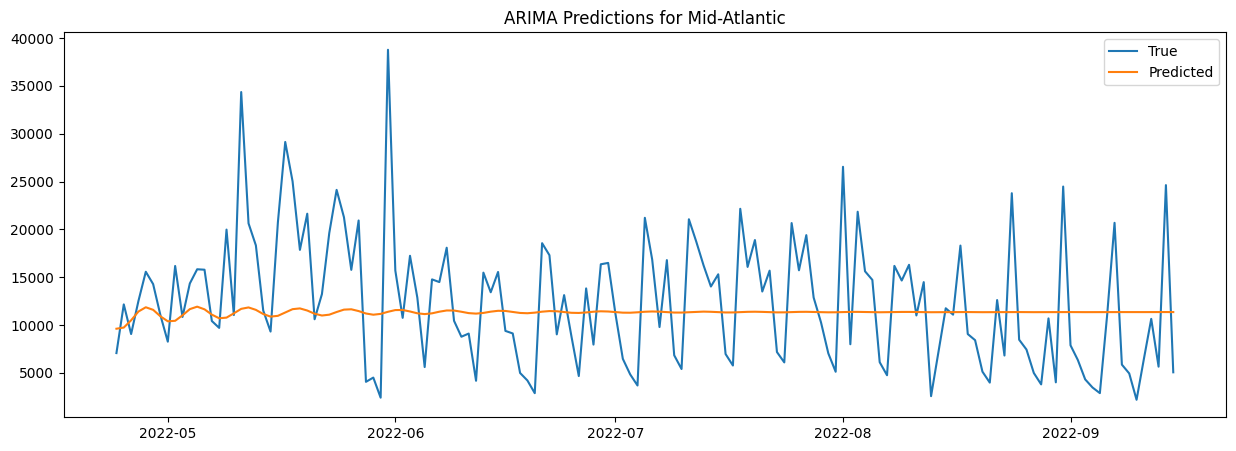


Training model for Mountain...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 4767.25
MSE: 58081545.3
RMSE: 7621.12
MASE: 1.51


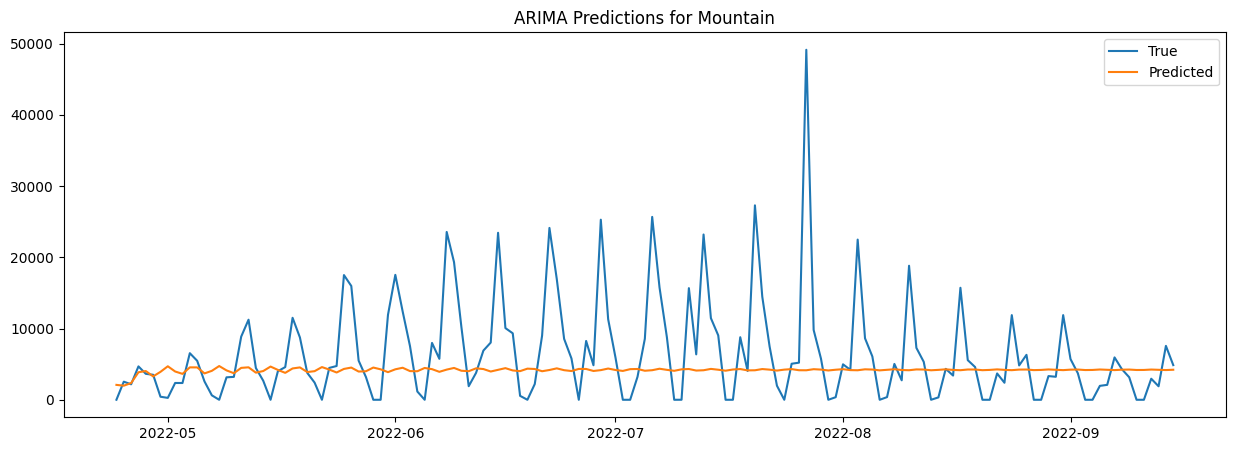


Training model for New England...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 3271.41
MSE: 18441119.2
RMSE: 4294.31
MASE: 1.31


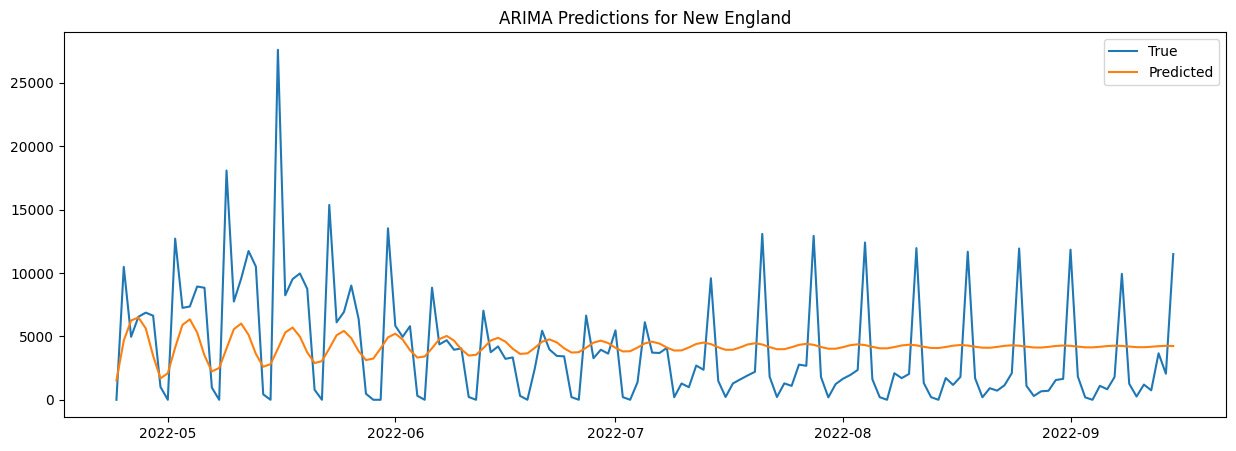


Training model for Pacific...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 15061.0
MSE: 473166397.24
RMSE: 21752.39
MASE: 2.25


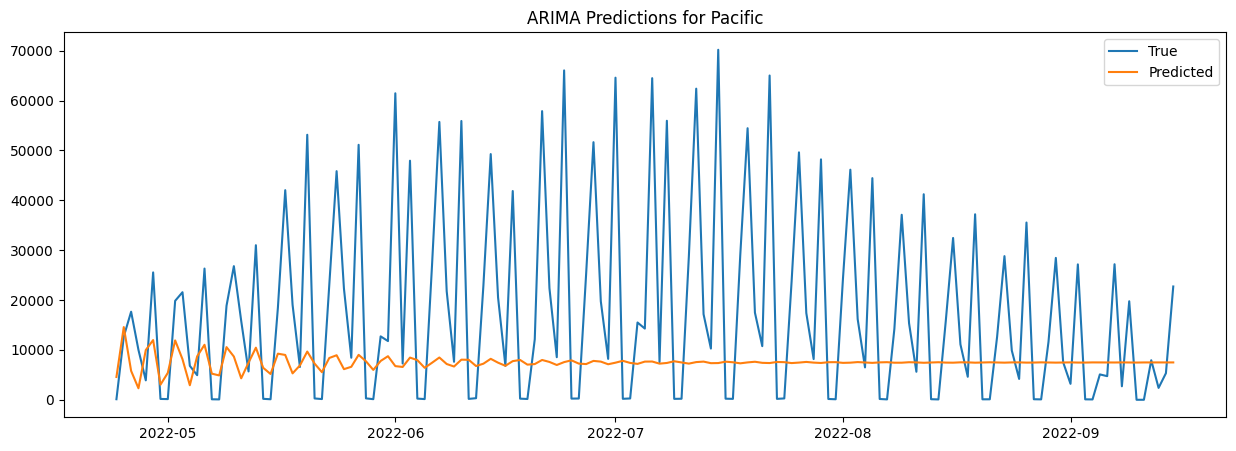


Training model for South Atlantic...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 17156.89
MSE: 588631258.05
RMSE: 24261.72
MASE: 1.65


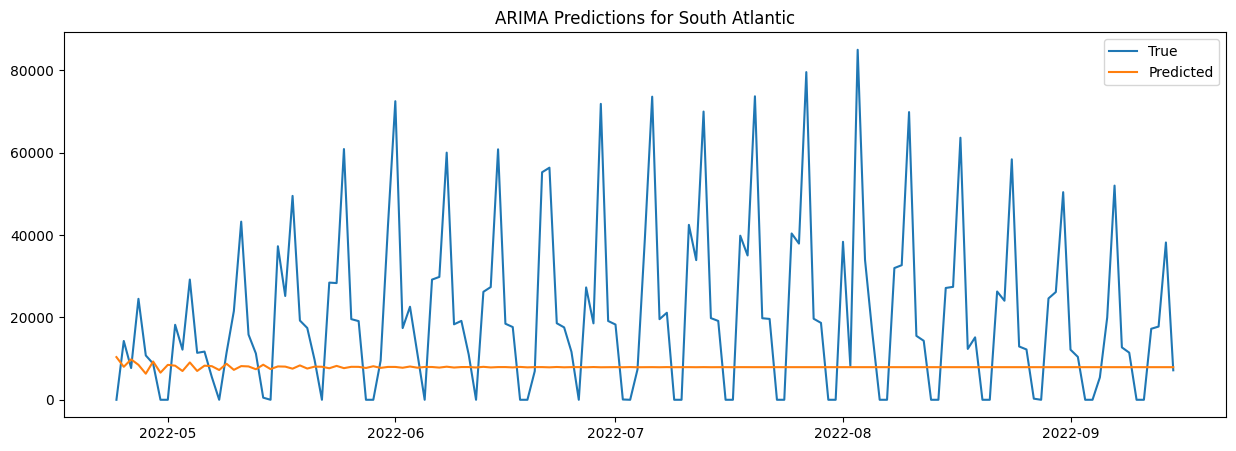


Training model for West North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 4104.25
MSE: 27684785.15
RMSE: 5261.63
MASE: 1.31


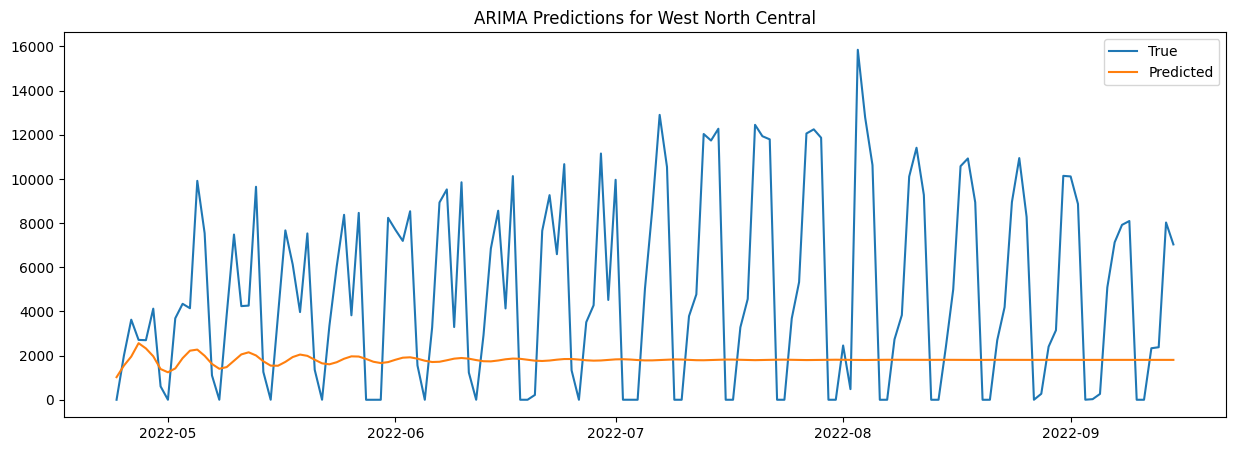


Training model for West South Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 8372.91
MSE: 127256086.2
RMSE: 11280.78
MASE: 1.9


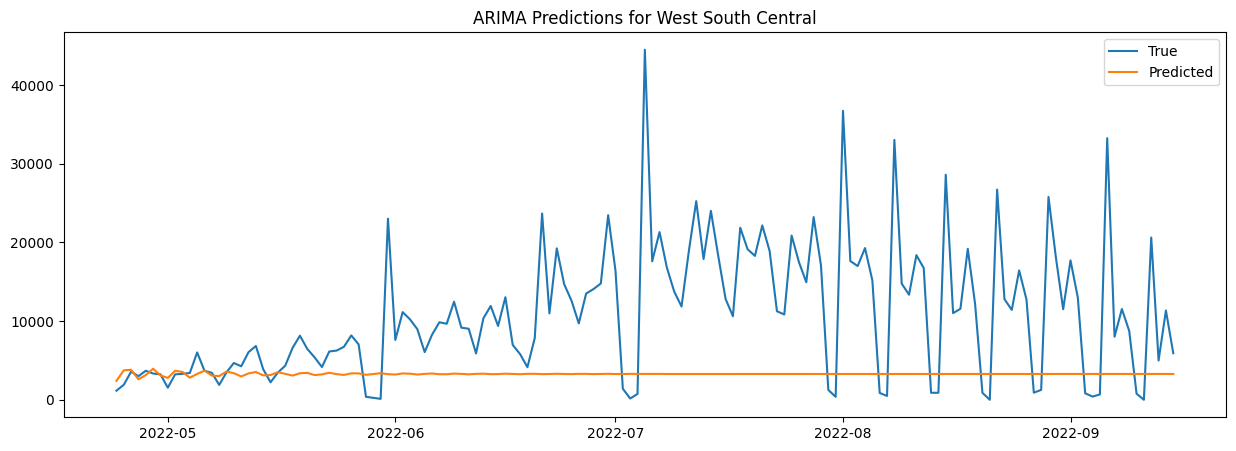


--- 9.08 seconds ---


In [13]:
start_time = time.time()
for df in datasets:
    build_arima_model(df, plot=True)
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")

## Parameter Optimization

In [14]:
def parameter_tune(df):
    region = df["region"].iloc[0]
    print(f"Training model for {region}...")

    size = round(df.shape[0]*0.15)
    train = df.iloc[:-size]['new_confirmed']
    test = df.iloc[-size:]['new_confirmed']

    results = []
    for p in range(1, 5):
        for d in range(2):
            for q in range(1, 5):
                model = ARIMA(train, order=(p,d,q))
                model_fit = model.fit()

                pred = model_fit.forecast(steps=size)

                # calculate metrics
                mae = mean_absolute_error(test, pred)
                mse = mean_squared_error(test, pred)
                rmse = mean_squared_error(test, pred, squared=False)
                mase = mean_absolute_scaled_error(test, pred, y_train=train)

                results.append([p, d, q, mae, mse, rmse, mase, model_fit.aic])
                
    results = pd.DataFrame(results, columns=["p", "d", "q", "mae", "mse", "rmse", "mase", "aic"])
    results.sort_values(by="mase", inplace=True)
    print(results.head())

In [15]:
start_time = time.time()
for df in datasets:
    parameter_tune(df)
    print("")

print(f"--- {round(time.time() - start_time, 2)} seconds ---")

Training model for East North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector

In [18]:
params = {
    "East North Central": (2, 0, 4),
    "East South Central": (2, 0, 2),
    "Mid-Atlantic": (3, 1, 4),
    "Mountain": (3, 1, 4),
    "New England": (4, 1, 1),
    "Pacific": (4, 0, 2),
    "South Atlantic": (1, 0, 4),
    "West North Central": (3, 0, 4),
    "West South Central": (2, 0, 4)
}

Training model for East North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 9142.11
MSE: 121889154.19
RMSE: 11040.34
MASE: 1.15


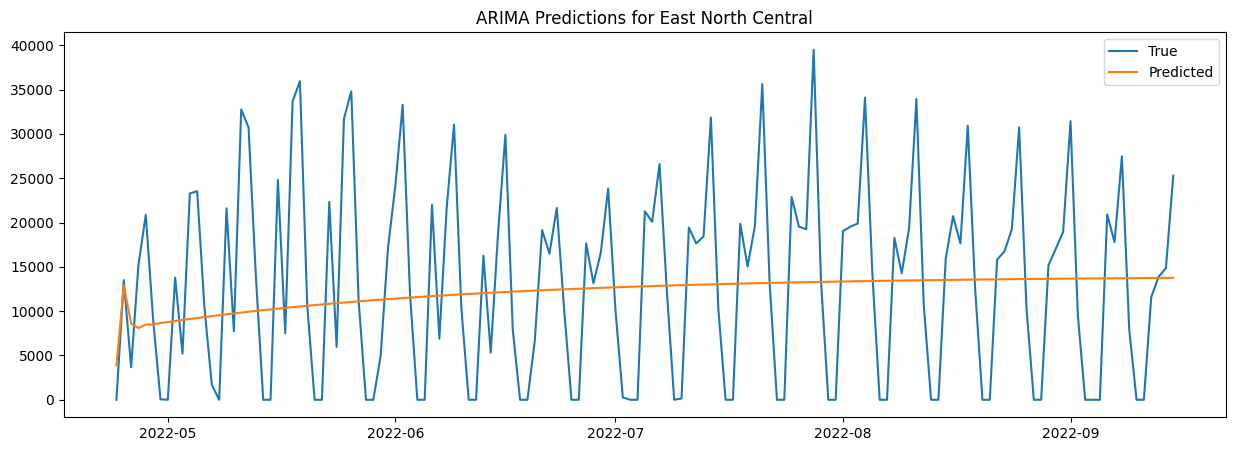


Training model for East South Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 4245.0
MSE: 37390147.61
RMSE: 6114.75
MASE: 1.28


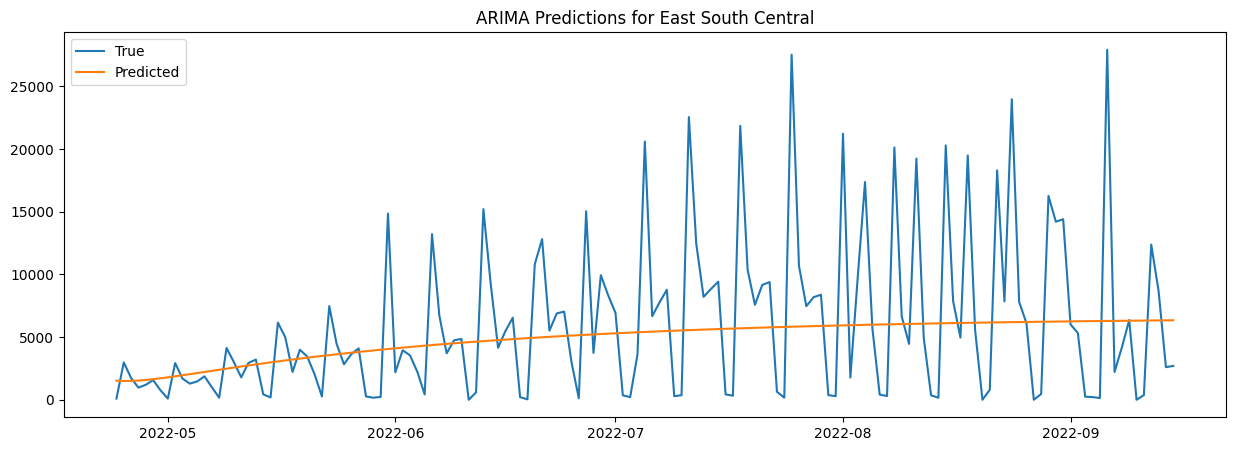


Training model for Mid-Atlantic...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 5389.07
MSE: 45671363.0
RMSE: 6758.06
MASE: 2.54


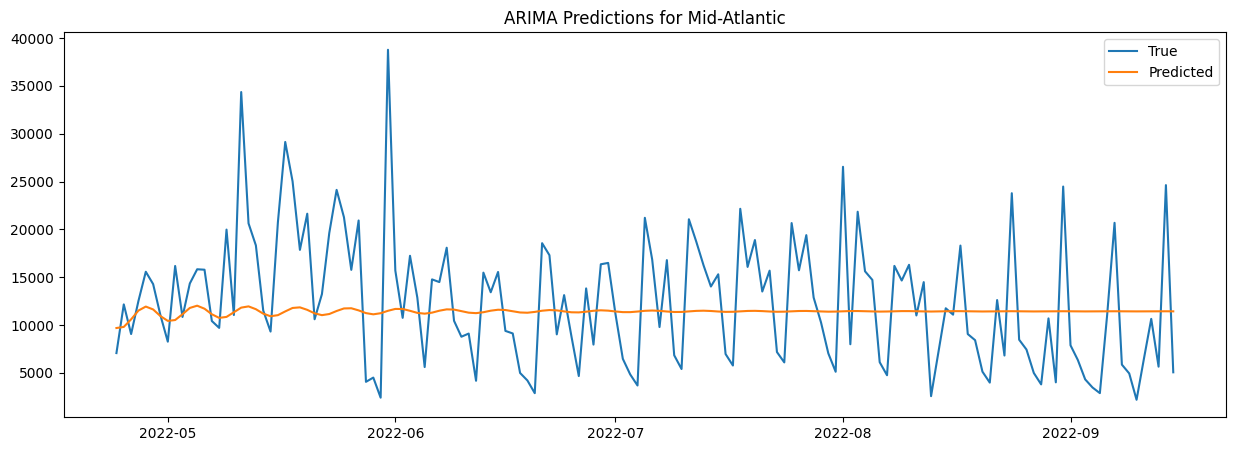


Training model for Mountain...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 4750.53
MSE: 56782930.17
RMSE: 7535.44
MASE: 1.5


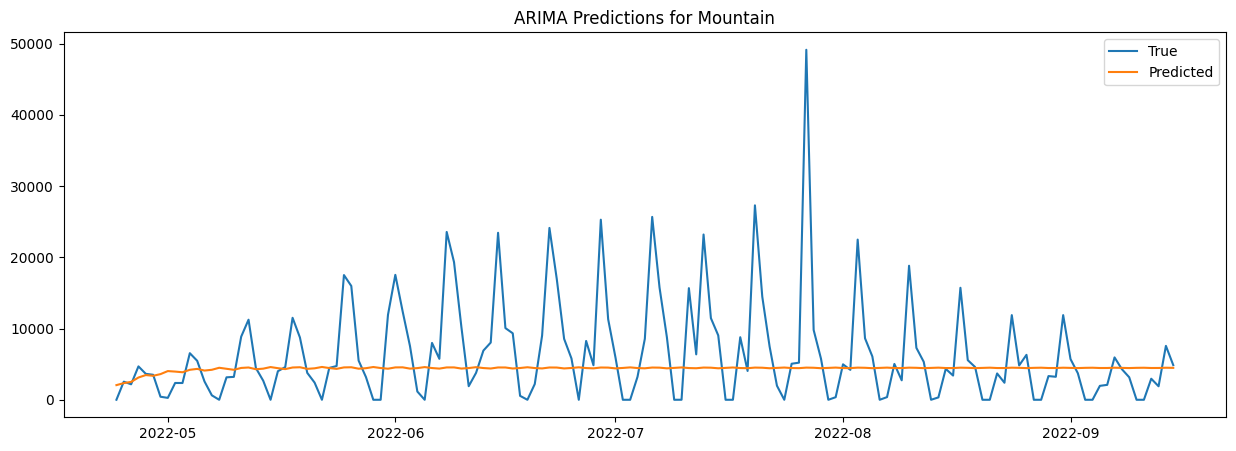


Training model for New England...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 3482.14
MSE: 20179001.39
RMSE: 4492.1
MASE: 1.39


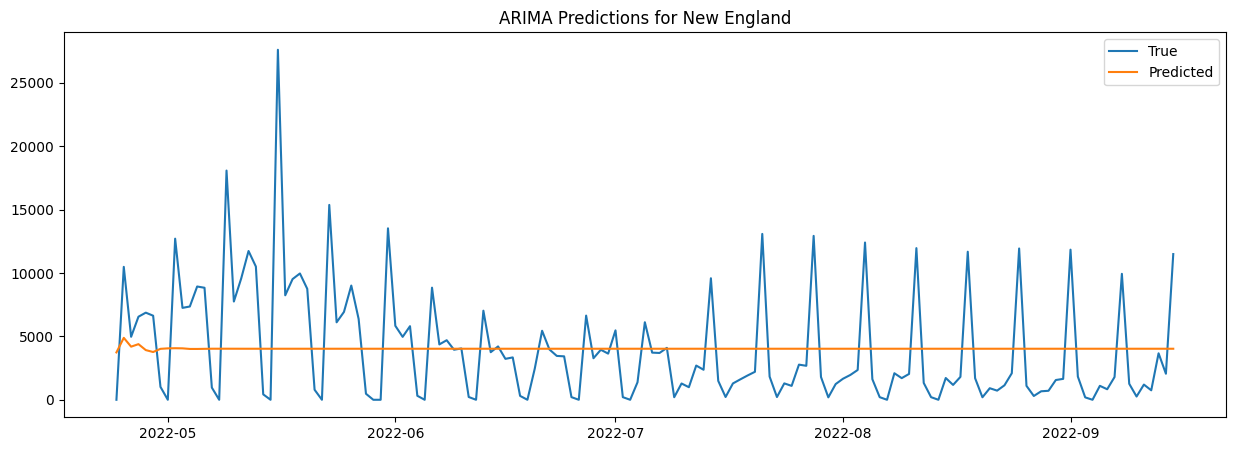


Training model for Pacific...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 14661.16
MSE: 371982963.06
RMSE: 19286.86
MASE: 2.19


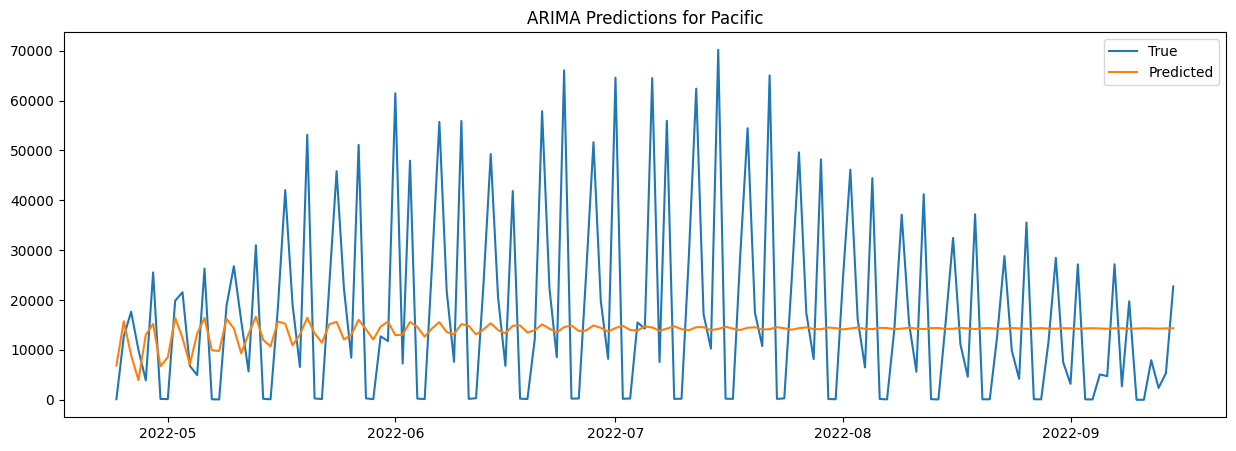


Training model for South Atlantic...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 14896.98
MSE: 425918744.48
RMSE: 20637.8
MASE: 1.43


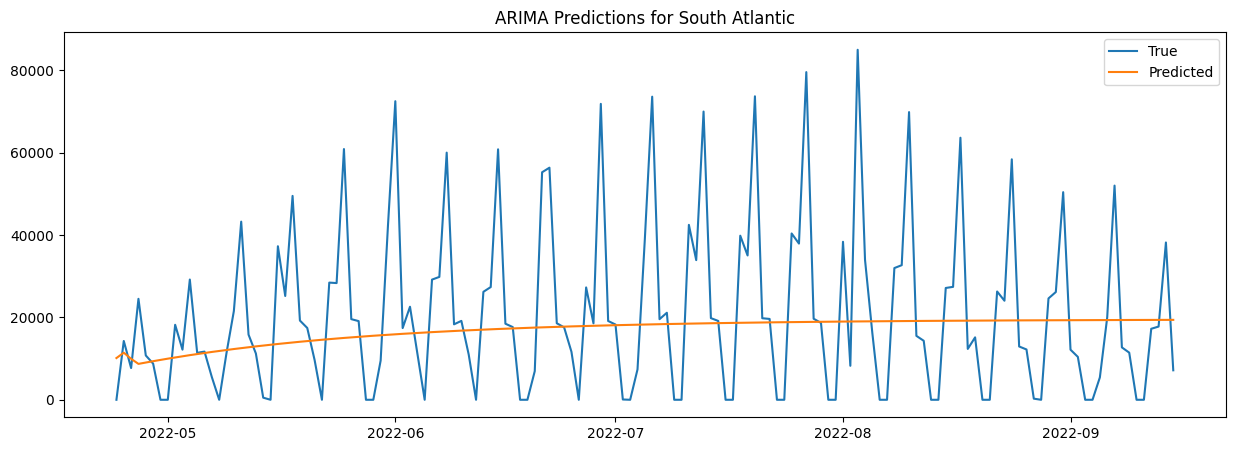


Training model for West North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 3670.36
MSE: 17741154.41
RMSE: 4212.02
MASE: 1.17


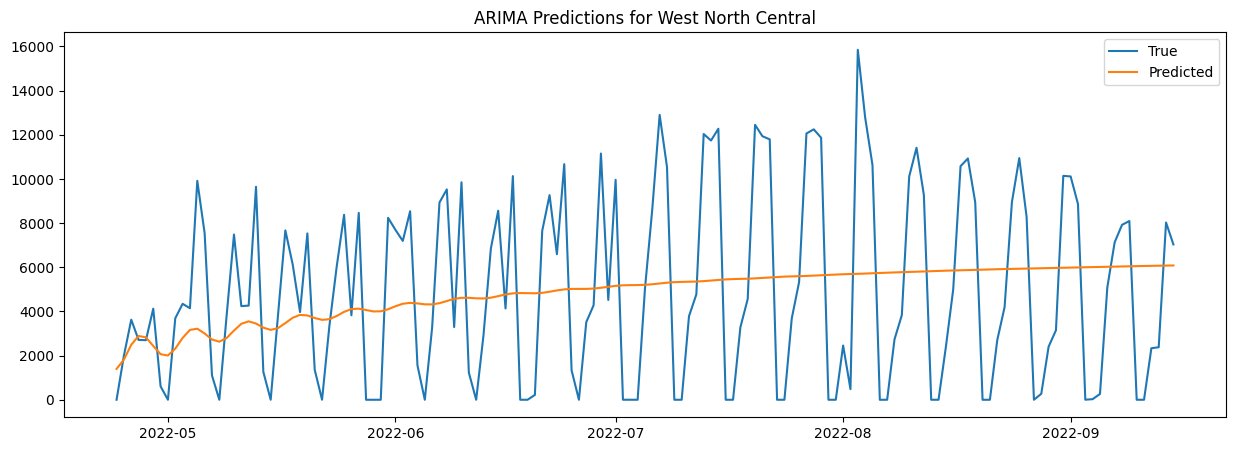


Training model for West South Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 5634.59
MSE: 61891028.1
RMSE: 7867.09
MASE: 1.28


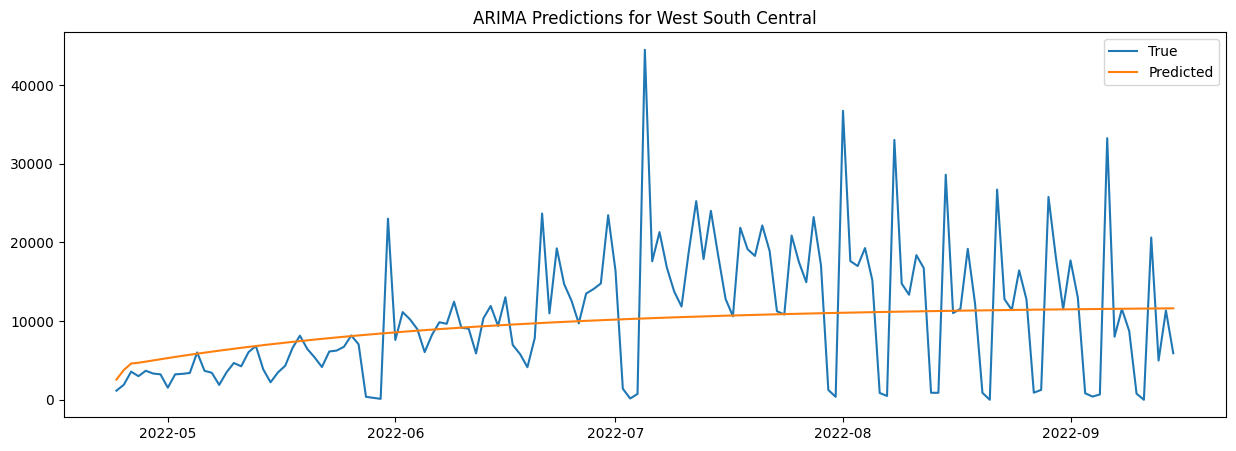


--- 6.23 seconds ---


In [19]:
start_time = time.time()
for df in datasets:
    build_arima_model(df, params=params[df["region"].iloc[0]], plot=True)
    print("")

print(f"--- {round(time.time() - start_time, 2)} seconds ---")

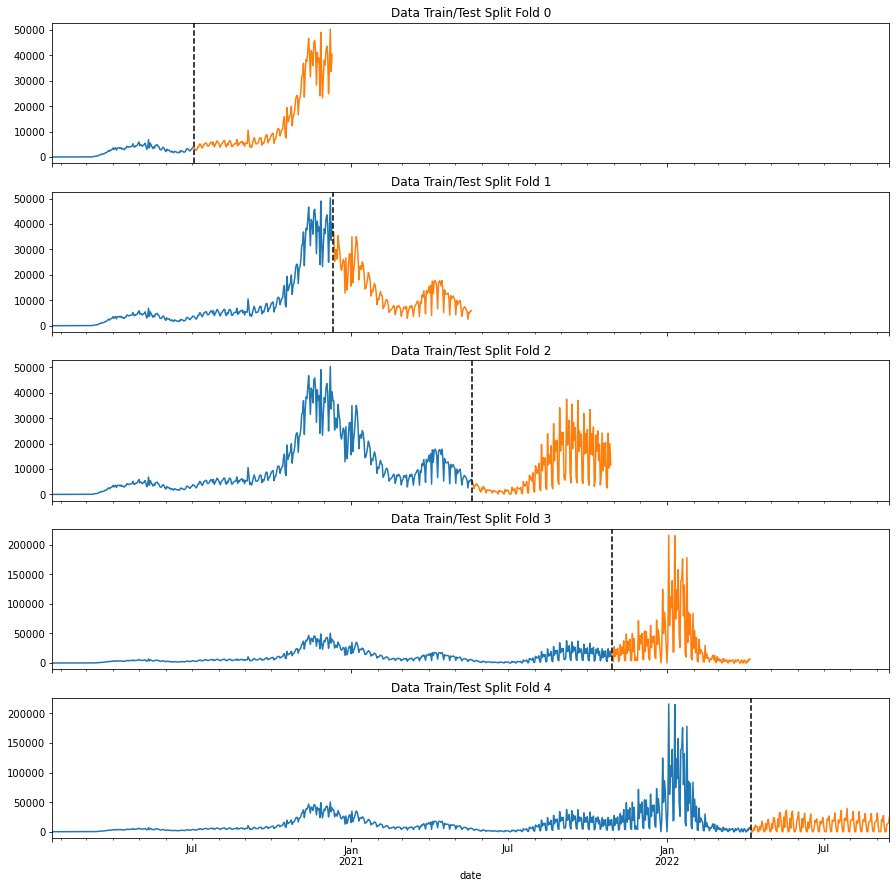

In [55]:
tss = TimeSeriesSplit(n_splits = 5)
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(enc['new_confirmed']):
    train = enc.iloc[train_idx]
    test = enc.iloc[val_idx]
    train['new_confirmed'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['new_confirmed'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def cross_validate_arima_model(df, params=None, n_splits=5, plot=False):
    region = df["region"].iloc[0]
    print(f"Cross-validating model for {region}...")

    time_series = df['new_confirmed']
    window_size = int(len(time_series) / n_splits)
    
    metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'MASE': []}
    
    for i in range(n_splits - 1):
        train_end = (i + 1) * window_size
        test_end = (i + 2) * window_size
        train, test = time_series[:train_end], time_series[train_end:test_end]
        
        if params:
            model = ARIMA(train, order=params)
        else:
            model = ARIMA(train, order=(4,1,4))
        model_fit = model.fit()
        pred = model_fit.forecast(steps=len(test))
        
        mae = mean_absolute_error(test, pred)
        mse = mean_squared_error(test, pred)
        rmse = np.sqrt(mse)
        
        # Assuming you have a function for MASE calculation
        mase = mean_absolute_scaled_error(test, pred, y_train=train) # Define or adjust this function based on your needs
        
        metrics['MAE'].append(mae)
        metrics['MSE'].append(mse)
        metrics['RMSE'].append(rmse)
        metrics['MASE'].append(mase)
        
        # Optional: plot each fold
        if plot:
            plt.figure(figsize=(10, 6))
            plt.title(f'Fold {i+1} Predictions')
            plt.plot(train.index, train, label='Train')
            plt.plot(test.index, test, label='True')
            plt.plot(np.arange(len(train), len(train) + len(test)), pred, label='Predicted')
            plt.legend()
            plt.show()
    
    # Calculate and print average metrics
    for metric, values in metrics.items():
        print(f'{metric}: {np.mean(values):.2f}')

# Note: Ensure mean_absolute_scaled_error is defined or imported correctly.
# You might need to adjust the MASE calculation or replace it with an alternative metric if not applicable.


## Sarimax

In [20]:
def build_sarima_model(df, params=None, seasonal_params=None, plot=False):
    region = df["region"].iloc[0]
    print(f"Training model for {region}...")

    size = round(df.shape[0]*0.15)
    train = df.iloc[:-size]['new_confirmed']
    test = df.iloc[-size:]['new_confirmed']

    if params and seasonal_params:
         model = SARIMAX(train, order=params, seasonal_order=seasonal_params)
    elif params:
        model = SARIMAX(train, order=params, seasonal_order=(1, 1, 1,7))
    else:
        model = SARIMAX(train, order=(2, 0, 3), seasonal_order=(1, 1, 1,7))
    model_fit = model.fit(disp=False)

    pred = model_fit.forecast(steps=size)    

    # calculate metrics
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = mean_squared_error(test, pred, squared=False)
    mase = mean_absolute_scaled_error(test, pred, y_train=train)
    print(f'MAE: {round(mae, 2)}')
    print(f'MSE: {round(mse, 2)}')
    print(f'RMSE: {round(rmse, 2)}')
    print(f'MASE: {round(mase, 2)}')

    # plot predictions
    if plot:
        plt.figure(figsize=(15, 5))
        plt.title(f'SARIMA Predictions for {region}')
        plt.plot(test.index, test, label='True')
        plt.plot(pred.index, pred, label='Predicted')
        plt.legend() 
        plt.show()



Training model for East North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 7925.06
MSE: 106508863.0
RMSE: 10320.31
MASE: 1.0


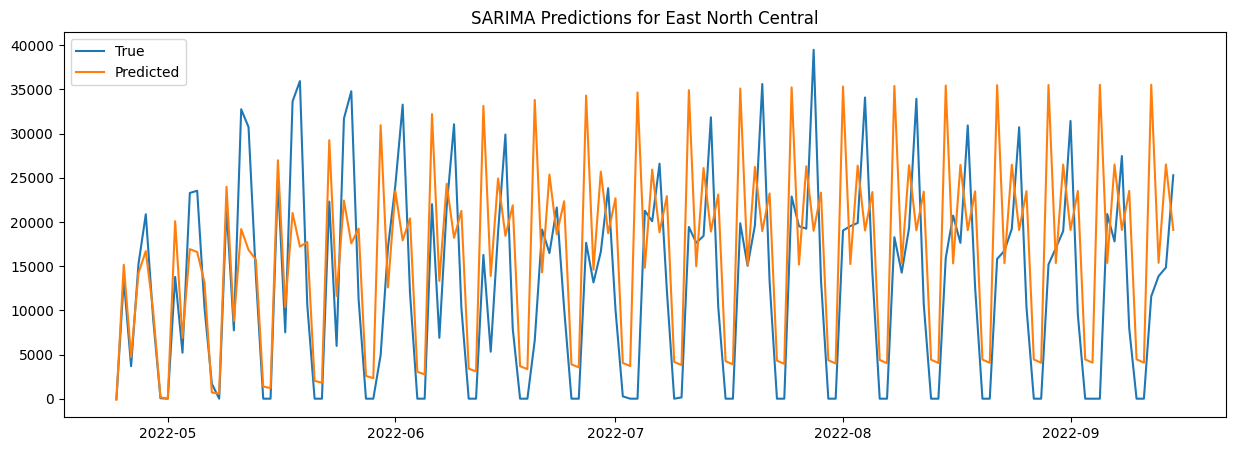


Training model for East South Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 3348.06
MSE: 26481706.55
RMSE: 5146.04
MASE: 1.01


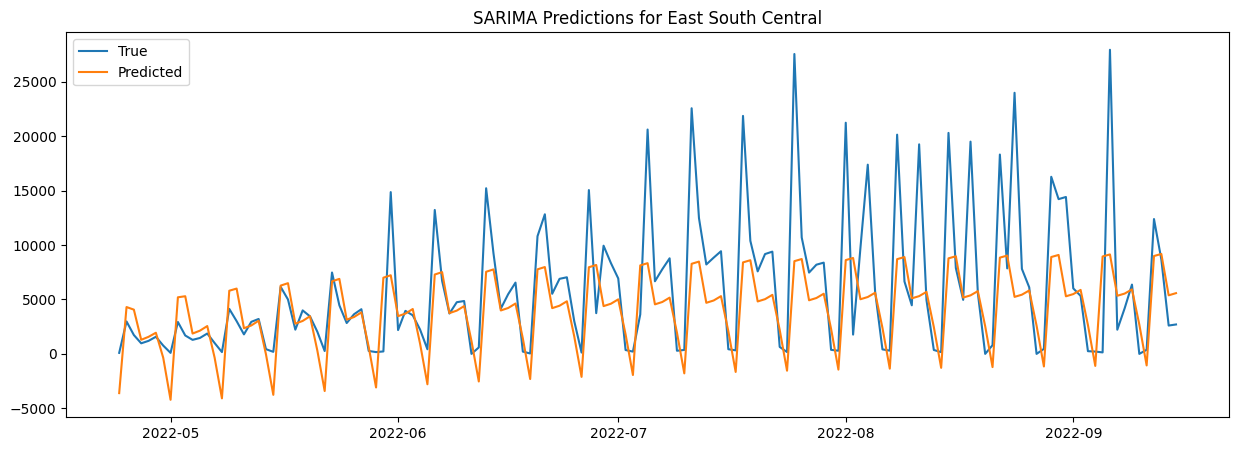


Training model for Mid-Atlantic...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 5868.39
MSE: 66779579.78
RMSE: 8171.88
MASE: 2.76


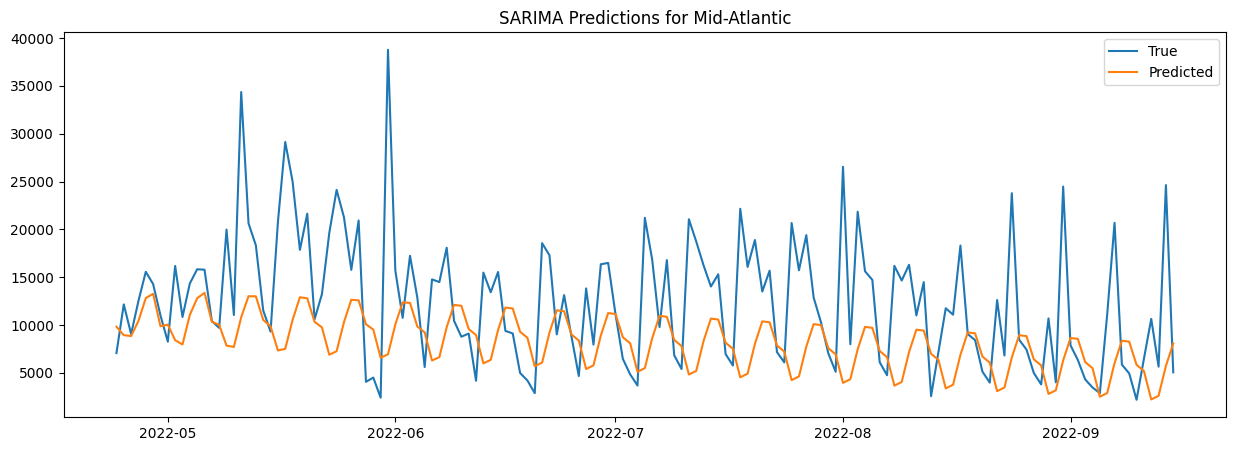


Training model for Mountain...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 9291.88
MSE: 128928335.44
RMSE: 11354.66
MASE: 2.94


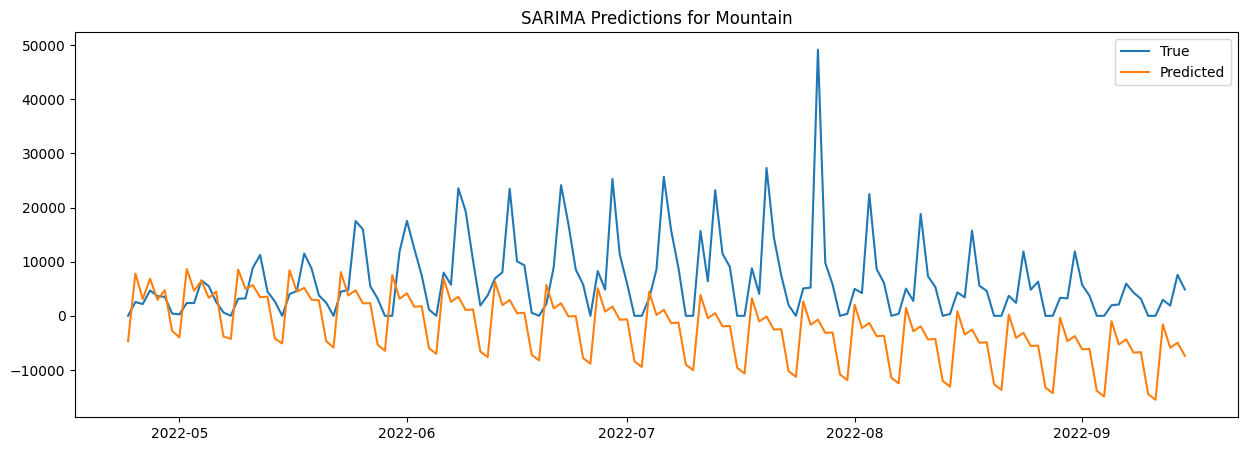


Training model for New England...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 6285.63
MSE: 56208775.37
RMSE: 7497.25
MASE: 2.52


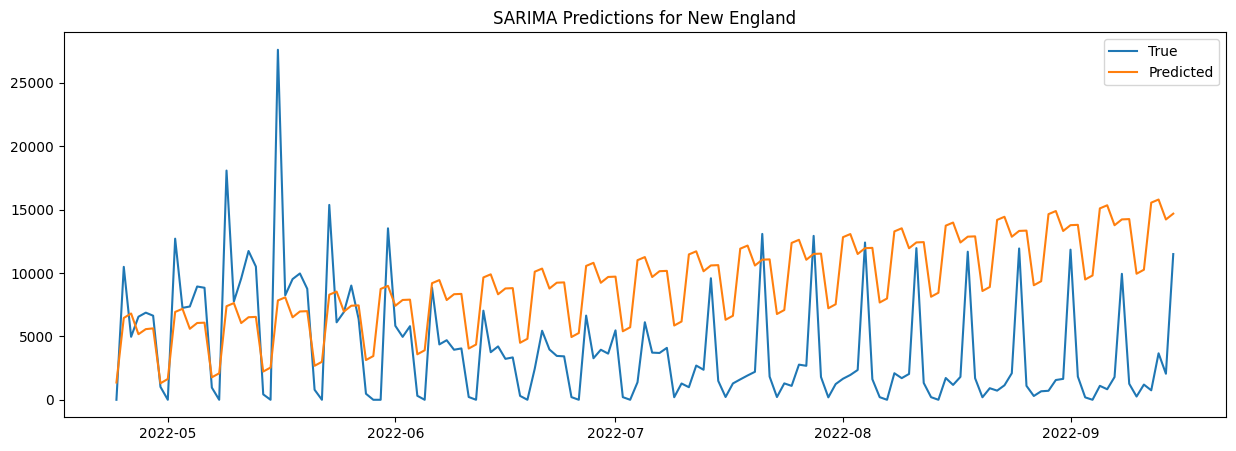


Training model for Pacific...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 12413.99
MSE: 284268746.36
RMSE: 16860.27
MASE: 1.85


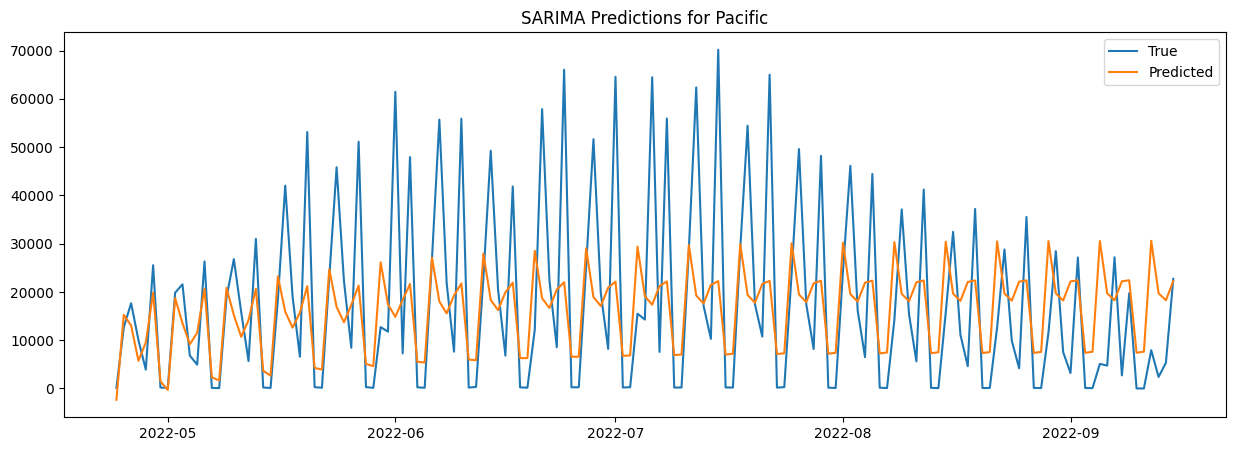


Training model for South Atlantic...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 14854.8
MSE: 464059369.22
RMSE: 21542.04
MASE: 1.43


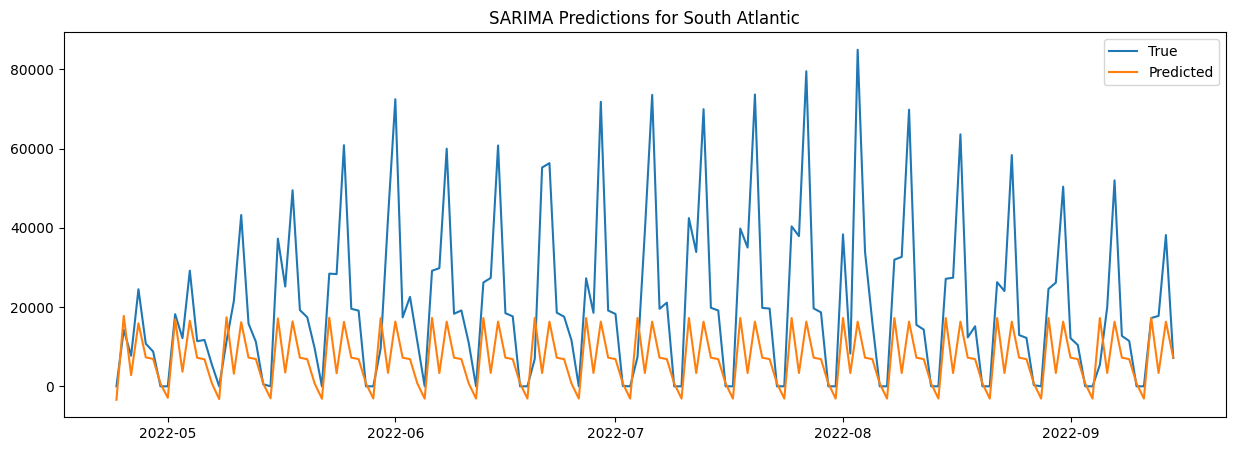


Training model for West North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 3751.08
MSE: 22222288.89
RMSE: 4714.05
MASE: 1.2


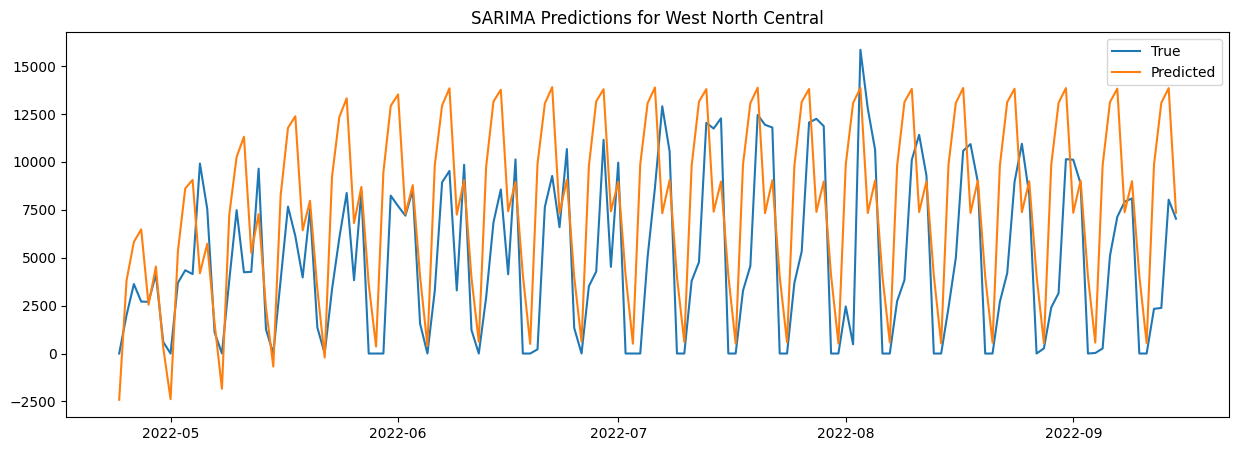


Training model for West South Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 5828.22
MSE: 55313138.46
RMSE: 7437.28
MASE: 1.32


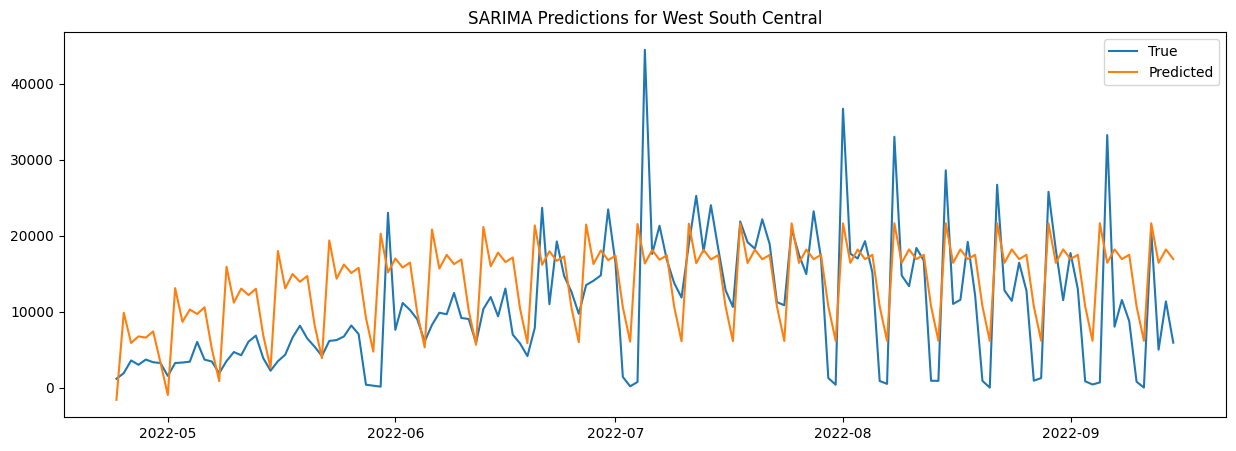


--- 77.85 seconds ---


In [21]:
start_time = time.time()
for df in datasets:
    build_sarima_model(df, params=params[df["region"].iloc[0]], plot=True)
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")

In [29]:
def sarima_parameter_tune(df, params, D=0):
    region = df["region"].iloc[0]
    print(f"Training model for {region}...")

    size = round(df.shape[0]*0.15)
    train = df.iloc[:-size]['new_confirmed']
    test = df.iloc[-size:]['new_confirmed']

    results = []
    # for p in range(1, 3):
    #     # for d in range(2):
    #     for q in range(1, 3):
    for P in range(1, 4):
        for Q in range(1, 4):
            model = SARIMAX(train, order=params, seasonal_order=(P, D, Q, 7))
            model_fit = model.fit(disp=False)

            pred = model_fit.forecast(steps=size)

            # calculate metrics
            mae = mean_absolute_error(test, pred)
            rmse = mean_squared_error(test, pred, squared=False)
            mase = mean_absolute_scaled_error(test, pred, y_train=train)

            results.append([P, Q, mae, rmse, mase, model_fit.aic])
                
    results = pd.DataFrame(results, columns=["P", "Q", "mae", "rmse", "mase", "aic"])
    results.sort_values(by="mase", inplace=True)
    print(results.head())

In [26]:
start_time = time.time()
for df in datasets:
    sarima_parameter_tune(df, params[df["region"].iloc[0]])
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")

Training model for East North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector

LinAlgError: LU decomposition error.

In [28]:
start_time = time.time()
for df in [wsc]:
    sarima_parameter_tune(df, params[df["region"].iloc[0]])
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")

Training model for West South Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector

In [30]:
sarima_parameter_tune(wnc, params[df["region"].iloc[0]], D=1)

Training model for West North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector

In [31]:
start_time = time.time()
for df in datasets:
    sarima_parameter_tune(df, params[df["region"].iloc[0]], D=1)
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")

Training model for East North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector

## Final SARIMA

In [32]:
seasonal_params = {
    "East North Central": (3, 1, 2, 7),
    "East South Central": (2, 1, 3, 7),
    "Mid-Atlantic": (1, 0, 1, 7),
    "Mountain": (1, 0, 2, 7),
    "New England": (3, 0, 2, 7),
    "Pacific": (2, 1, 2, 7),
    "South Atlantic": (1, 1, 3, 7),
    "West North Central": (1, 1, 1, 7),
    "West South Central": (3, 0, 3, 7),
}


Training model for East North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 7060.16
MSE: 82744297.72
RMSE: 9096.39
MASE: 0.89


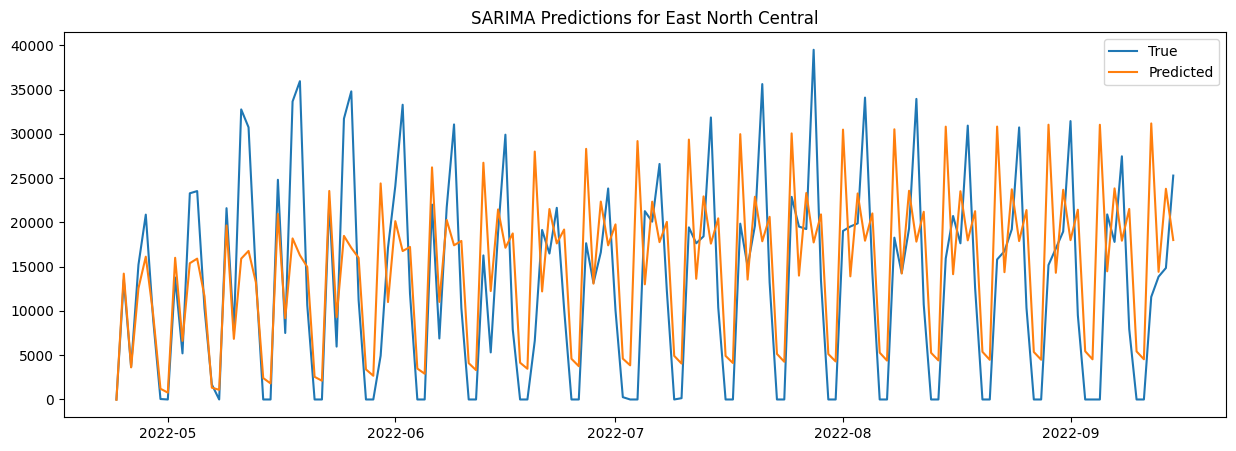


Training model for East South Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 3034.71
MSE: 21598120.12
RMSE: 4647.38
MASE: 0.92


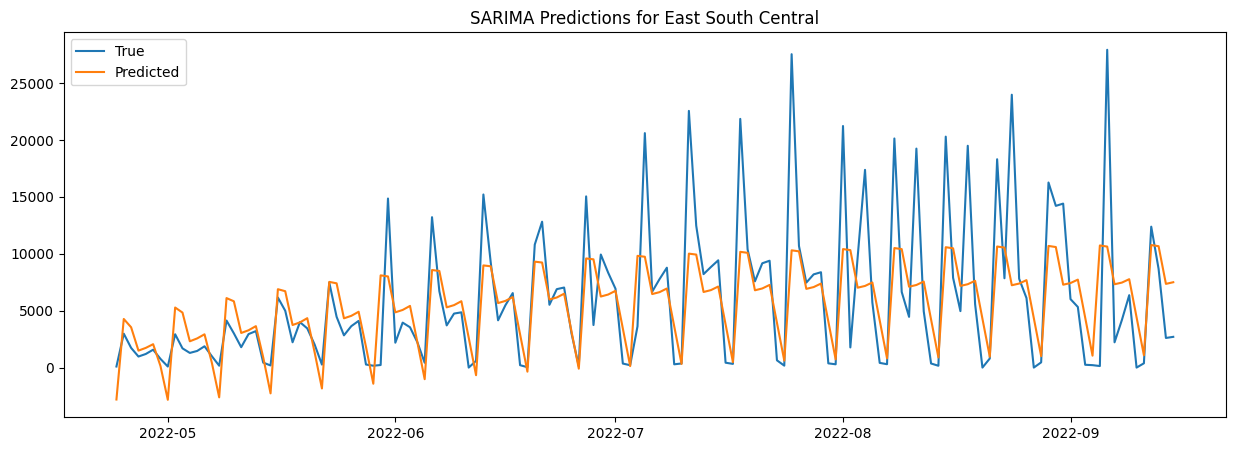


Training model for Mid-Atlantic...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 5386.87
MSE: 45856223.11
RMSE: 6771.72
MASE: 2.54


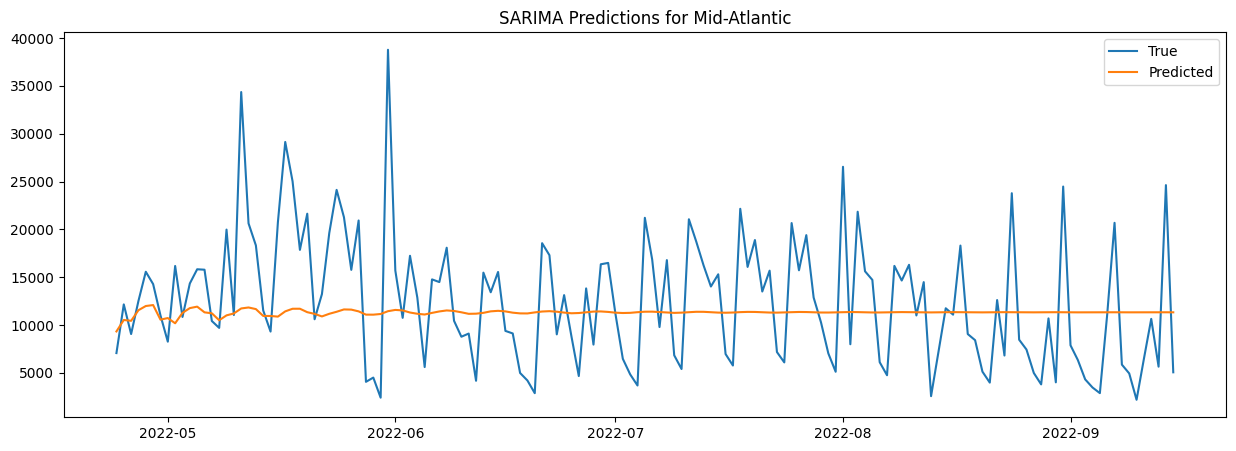


Training model for Mountain...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 4274.3
MSE: 50913036.12
RMSE: 7135.34
MASE: 1.35


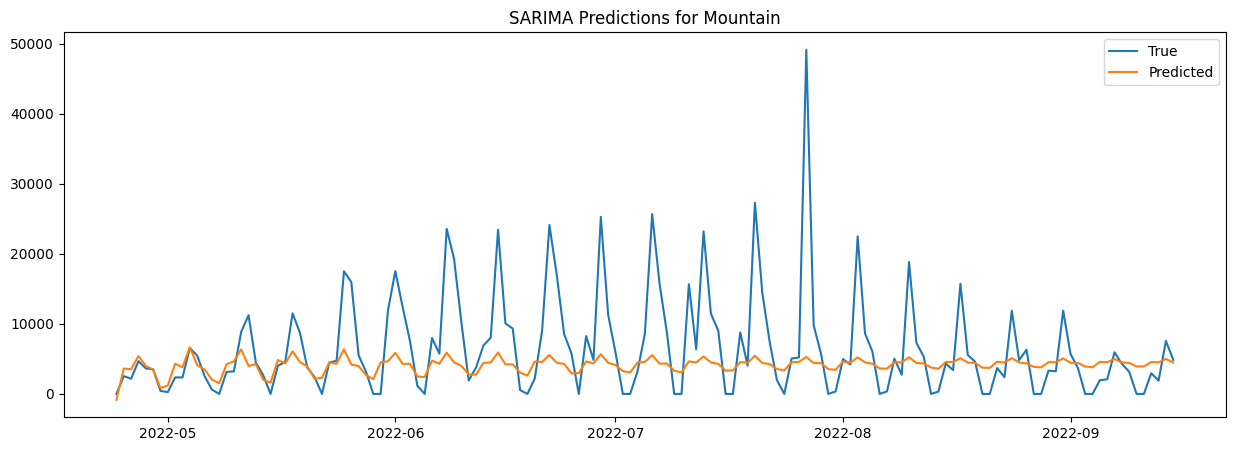


Training model for New England...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 4030.69
MSE: 22010857.94
RMSE: 4691.57
MASE: 1.61


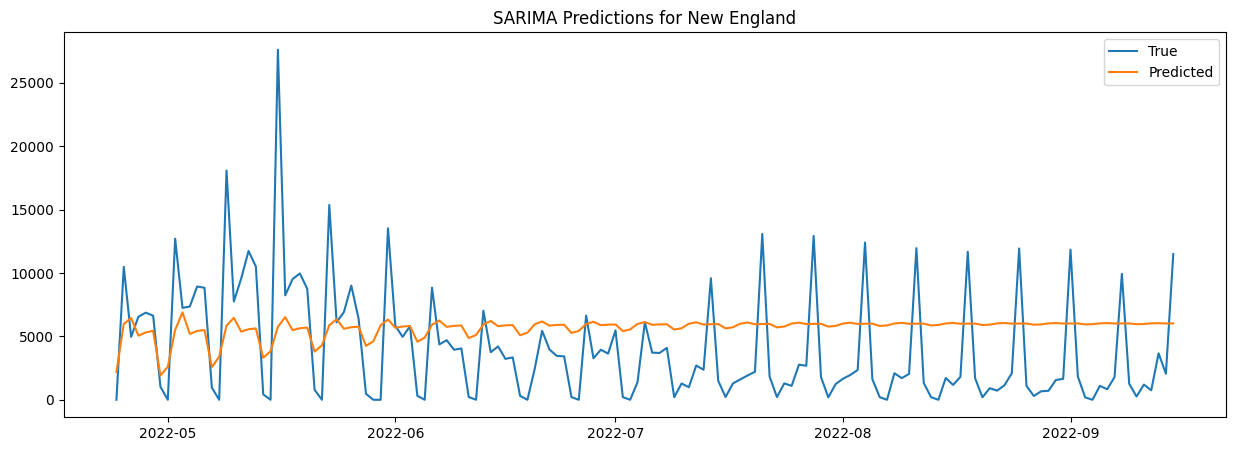


Training model for Pacific...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 10558.69
MSE: 288719071.1
RMSE: 16991.74
MASE: 1.58


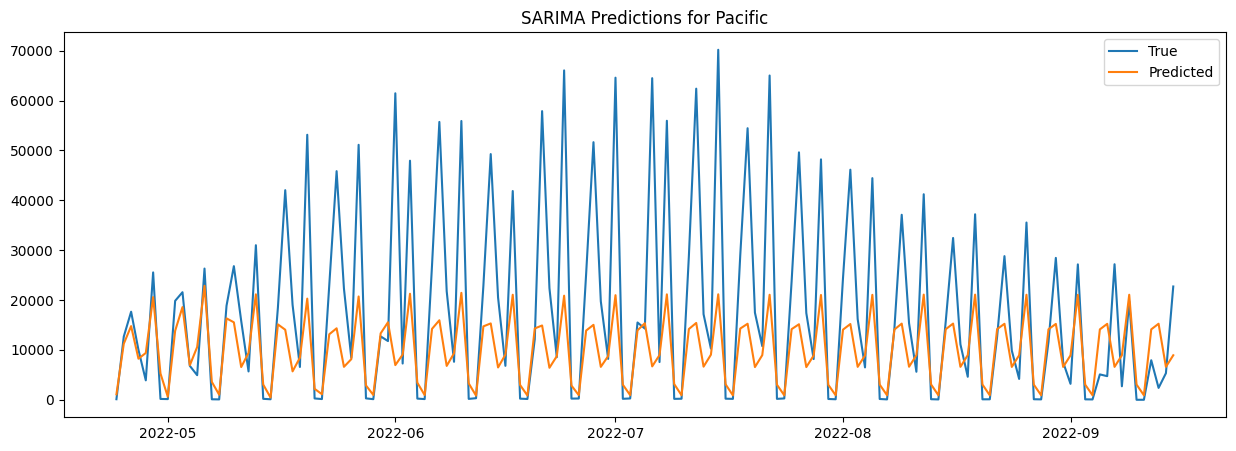


Training model for South Atlantic...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 11963.12
MSE: 279211946.33
RMSE: 16709.64
MASE: 1.15


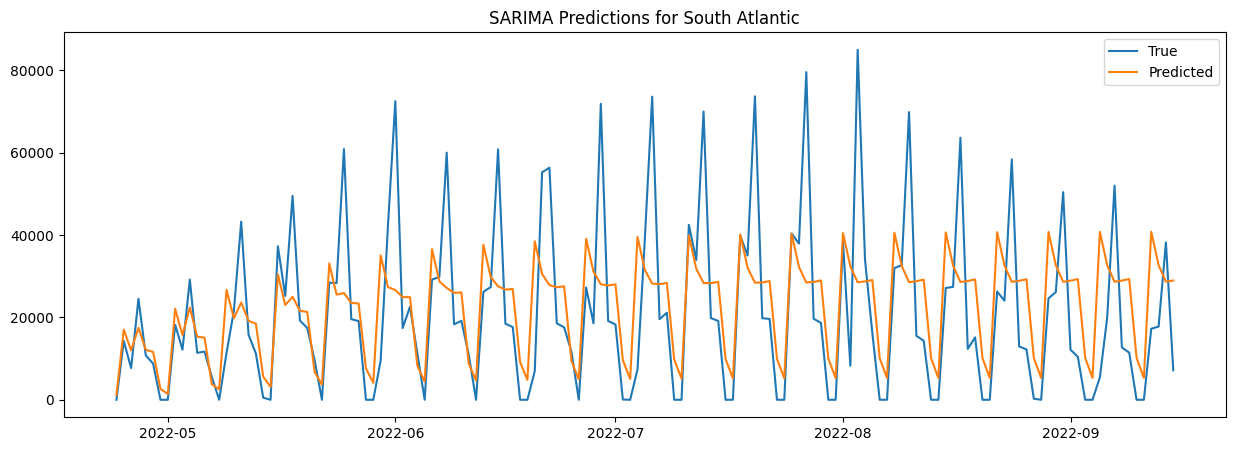


Training model for West North Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 3751.08
MSE: 22222288.89
RMSE: 4714.05
MASE: 1.2


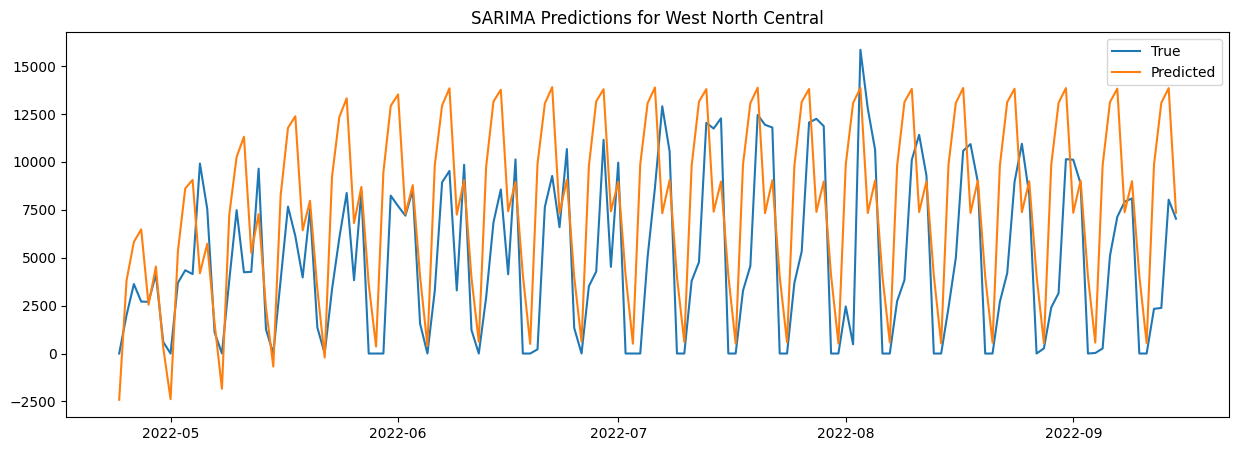


Training model for West South Central...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MAE: 5319.61
MSE: 50280839.67
RMSE: 7090.9
MASE: 1.2


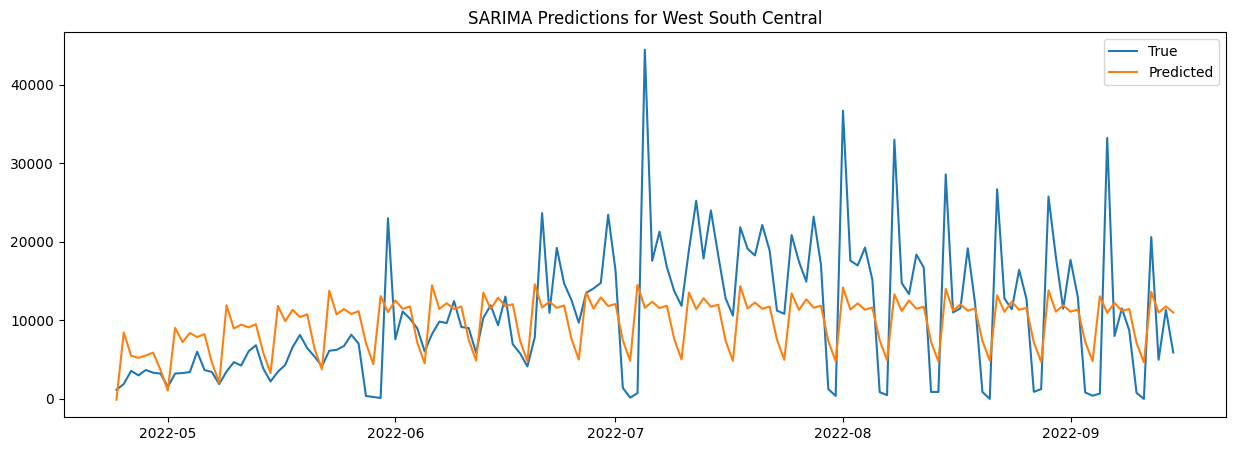


--- 192.88 seconds ---


In [35]:
start_time = time.time()
for df in datasets:
    region = [df["region"].iloc[0]][0]
    build_sarima_model(df, params=params[region], seasonal_params=seasonal_params[region], plot=True)
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")